## Library imports

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, Dropout
from matplotlib import pyplot as plt
import pandas as pd

## Loading the dataset

In [3]:
traindf = pd.read_csv("Data/train.csv")
testdf = pd.read_csv("Data/test.csv")

In [4]:
print(traindf.shape)
traindf.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(testdf.shape)
testdf.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are 10 classes to classify the images into (0-9)

In [6]:
train_lbls = traindf.label
print(len(train_lbls))
print(len(np.unique(train_lbls)))

42000
10


Shape of the test and train labels to see how many test and train images we have

In [7]:
X_train = traindf.drop(labels = ["label"],axis = 1)
print(X_train.shape)

(42000, 784)


We have 42,000 images, each one is 28x28 

Converting values to lie between 0 and 1 (since they are currently digits between 0 and 255, denoting how black each pixel is)

In [30]:
X_train = X_train / 255.0
test = testdf.as_matrix() / 255.0

In [31]:
test_data = test.astype('float32')

Reshaping the training and test data so the neural network can take it as an input (4 dimensions)

In [10]:
X_train = X_train.values.reshape(-1,28,28,1)

In [32]:
test_data = test.reshape(-1, 28, 28, 1)

Keras uses one hot encoding

Hence changing the labels from integer to categorical data

In [12]:
train_labels_one_hot = to_categorical(train_lbls)

#Display the category label using one-hot encoding
print('Original label : ', train_lbls[2])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[2])

Original label :  1
After conversion to categorical ( one-hot ) :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


**Our data is now ready to be inputted into a neural network**

## Making the Keras Model

In [16]:
model=Sequential()

model.add(Conv2D(kernel_size=5,strides=1,filters=64,
                padding='same',activation='relu', input_shape = (28,28,1)))
model.add(Conv2D(kernel_size=5,strides=1,filters=64,
                padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(kernel_size=5,strides=1,filters=64,
                padding='same',activation='relu'))
model.add(Conv2D(kernel_size=5,strides=1,filters=64,
                padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

Adding dropout layers to reduce overfitting

[Read more about layers here](https://forums.fast.ai/t/dense-vs-convolutional-vs-fully-connected-layers/191/2 "Layers info.")

The last Dense layer has 10 units (since we need to classify into 10 classes (0-9))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

Using the Adam optimizer

In [18]:
from keras.optimizers import Adam
optimizer=Adam(lr=1e-3)

### Compiling the model, using the Adam optimizer, with a categorical crossentropy loss so we can predict into multiple classes

In [19]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=["accuracy"])

### Fitting out data onto the model, with 256 images at a time, for 10 epochs.

In [21]:
history = model.fit(x=X_train, y=train_labels_one_hot,
                    batch_size=256, epochs=10, verbose=1)

Epoch 1/10
42000/42000 [==============================] - 93s 2ms/step - loss: 0.2688 - acc: 0.9137
Epoch 2/10
42000/42000 [==============================] - 83s 2ms/step - loss: 0.0556 - acc: 0.9828
Epoch 3/10
42000/42000 [==============================] - 82s 2ms/step - loss: 0.0401 - acc: 0.9874
Epoch 4/10
42000/42000 [==============================] - 82s 2ms/step - loss: 0.0311 - acc: 0.9900
Epoch 5/10
42000/42000 [==============================] - 83s 2ms/step - loss: 0.0238 - acc: 0.9924
Epoch 6/10
42000/42000 [==============================] - 83s 2ms/step - loss: 0.0210 - acc: 0.9932
Epoch 7/10
42000/42000 [==============================] - 83s 2ms/step - loss: 0.0267 - acc: 0.9918
Epoch 8/10
42000/42000 [==============================] - 83s 2ms/step - loss: 0.0157 - acc: 0.9951
Epoch 9/10
42000/42000 [==============================] - 83s 2ms/step - loss: 0.0139 - acc: 0.9956
Epoch 10/10
42000/42000 [==============================] - 83s 2ms/step - loss: 0.0119 - acc: 0.9962

### Plotting the accuracy

Text(0.5,1,'Accuracy Plot')

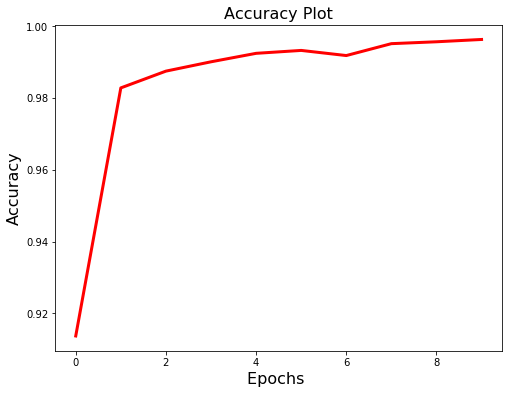

In [23]:
%matplotlib inline
#Checking for overfitting

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Plot',fontsize=16)

### Predicting the values of the test data

In [34]:
predictions = model.predict(test_data)

predictions = [np.argmax(i) for i in predictions]
len(predictions)

28000

### Plotting some image predictions from our neural model

In [35]:
img_shape=(28,28)

def plot_images(images, cls_pred=None):
    assert len(images) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        xlabel = "Pred: {0}".format(cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [37]:
images = test_data[9:18]

y_pred=model.predict(x=images)
cls_pred=np.argmax(y_pred,axis=1)

cls_pred

array([3, 5, 7, 4, 0, 4, 3, 3, 1], dtype=int64)

In [38]:
y_pred = model.predict(x=images)
cls_pred = np.argmax(y_pred, axis=1)

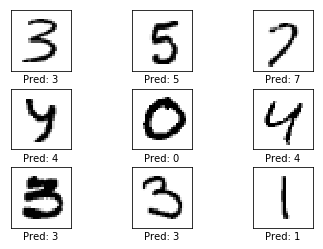

In [40]:
plot_images(images=images,
           cls_pred=cls_pred)

### Hence we have used Neural Networks to successfully predict handwritten image classes, with pretty high accuracy

### Making a submission file for Kaggle:

In [41]:
data = list(zip(list(range(1, 28001)), predictions))

submission_df = pd.DataFrame(data, columns=['ImageId','Label'])
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [42]:
submission_df.to_csv("Submission.csv",index=False)